# Librerias

In [1]:
# cargamos las librerías que nos hacen falta para trabajar. 

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

# Cargamos datos

In [2]:
df = pd.read_csv("../01_data/train_nonull_nooutliers_encoding.csv", index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
id,,,,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,3.0,5.0,0.0
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,4.0,6.0,5.0
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,4.0,3.0,3.0
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,2.0,4.0,0.0
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,3.0,4.0,4.0


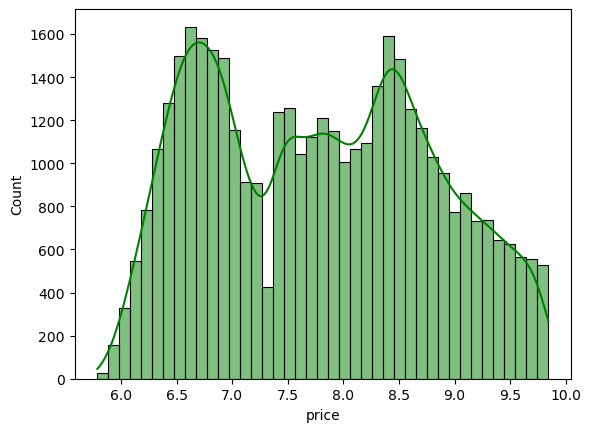

In [3]:
sns.histplot(df["price"], 
             kde = True, 
             color = "green");

In [5]:
stats.shapiro(df["price"])

ShapiroResult(statistic=0.9629883170127869, pvalue=0.0)

# Transformación logarítmica

In [6]:
df['price_LOG'] = df['price'].apply(lambda x: np.log(x) if x != 0 else 0)

In [7]:
stats.shapiro(df["price_LOG"])

ShapiroResult(statistic=0.9636781811714172, pvalue=0.0)

# Transformación con raíz cuadrada

In [8]:
df['price_SQRT'] = df['price'].apply(lambda x: math.sqrt(x))

In [9]:
stats.shapiro(df["price_SQRT"])

ShapiroResult(statistic=0.9640153050422668, pvalue=0.0)

# Sklearn MinMaxScaller

In [10]:
from sklearn.preprocessing import MinMaxScaler

# construir el modelo de escalador
minmax = MinMaxScaler()

# ajustamos el modelo utilizando nuestro set de datos
X_normalizadas = minmax.fit_transform(df[["price"]])

# lo unimos a nuestro dataframe original
df["price_NORM2"] = X_normalizadas

In [11]:
stats.shapiro(df["price_NORM2"])

ShapiroResult(statistic=0.9629886150360107, pvalue=0.0)